# **Cat vs Dog Classification with SVM**

In [10]:
import zipfile
import os

# unzip dataset
with zipfile.ZipFile("/train.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/data")

# check folders
os.listdir("/content/data/train")[:10]


['dog.8015.jpg',
 'cat.4058.jpg',
 'dog.7079.jpg',
 'dog.3800.jpg',
 'cat.11511.jpg',
 'dog.8980.jpg',
 'cat.7394.jpg',
 'dog.1676.jpg',
 'dog.7021.jpg',
 'cat.2482.jpg']

**Importing Libraries**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


**Preprocessing Images**

In [12]:
import os
import cv2
import pandas as pd
import numpy as np
from tqdm import tqdm

data_dir = "/content/data/train"  # folder with images
image_size = 32  # smaller size for faster processing

X = []
y = []

# Sample only a subset of images (e.g., 2000 images)
all_images = os.listdir(data_dir)
sample_images = all_images[:2000]  # pick first 2000 images (or random.sample)

for img_name in tqdm(sample_images):
    label = 0 if "cat" in img_name else 1  # 0 = cat, 1 = dog
    img_path = os.path.join(data_dir, img_name)
    img = cv2.imread(img_path)
    if img is None:
        continue
    img = cv2.resize(img, (image_size, image_size))
    X.append(img.flatten())
    y.append(label)

# Create DataFrame
df = pd.DataFrame(X)
df['label'] = y
print(df.shape)


100%|██████████| 2000/2000 [00:02<00:00, 739.70it/s]


(2000, 3073)


**Train-Test Splitting**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


**Training SVM Classifier**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Step 4: Prepare features and labels
X = df.drop('label', axis=1).values  # all flattened pixel values
y = df['label'].values               # labels: 0 = cat, 1 = dog

# Step 4: Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 5: Train the SVM model
print("Training SVM...")
model = SVC(kernel='linear', random_state=42)  # linear kernel
model.fit(X_train, y_train)
print("Training completed!")

# Step 5: Evaluate the model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy*100:.2f}%\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Cat", "Dog"]))


Training SVM...
Training completed!
Accuracy on test set: 52.75%

Classification Report:
              precision    recall  f1-score   support

         Cat       0.49      0.52      0.50       185
         Dog       0.56      0.53      0.55       215

    accuracy                           0.53       400
   macro avg       0.53      0.53      0.53       400
weighted avg       0.53      0.53      0.53       400



**Evaluating Model**

In [15]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Cat", "Dog"]))


Accuracy: 0.5275

Classification Report:
               precision    recall  f1-score   support

         Cat       0.49      0.52      0.50       185
         Dog       0.56      0.53      0.55       215

    accuracy                           0.53       400
   macro avg       0.53      0.53      0.53       400
weighted avg       0.53      0.53      0.53       400



**Testing on a Random Images**

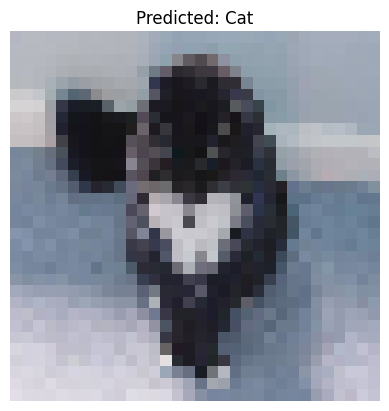

In [16]:
import random
import matplotlib.pyplot as plt

# pick a random test image
idx = random.randint(0, len(X_test)-1)
test_img = X_test[idx].reshape(image_size, image_size, 3)

plt.imshow(test_img.astype("uint8"))
plt.axis("off")
plt.title("Predicted: " + ("Dog" if y_pred[idx]==1 else "Cat"))
plt.show()

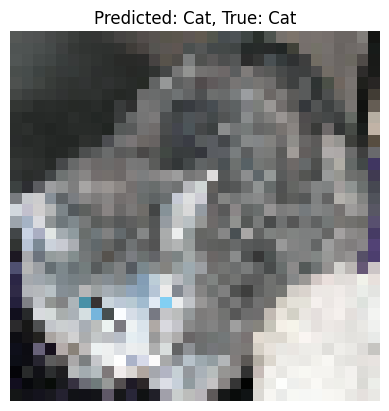

In [17]:
import random
import matplotlib.pyplot as plt

# pick a random test image
idx = random.randint(0, len(X_test)-1)
test_img = X_test[idx].reshape(image_size, image_size, 3)

true_label = "Dog" if y_test[idx] == 1 else "Cat"
pred_label = "Dog" if y_pred[idx] == 1 else "Cat"

plt.imshow(test_img.astype("uint8"))
plt.axis("off")
plt.title(f"Predicted: {pred_label}, True: {true_label}")
plt.show()
